In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive 
drive.mount('/content/drive')

path = "/content/Cleandf.csv"

Cleandf=pd.read_csv(path)

Cleandf.tail()

Mounted at /content/drive


,Unnamed: 0,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,...,newGlucose_1,totChol,cigsPerDay,BMI,heartRate,education,BPMeds,glucose,newGlucose,selectedCase
3271,3271,1,68,1,0,0,0,109.0,73.0,0,...,66.0,250,10,24.68,72,2,0,66.0,66,1
3272,3272,1,68,1,0,0,0,122.0,70.0,0,...,60.0,261,10,26.37,96,1,0,60.0,60,1
3273,3273,1,68,1,0,0,0,145.0,67.0,1,...,72.0,193,15,23.13,75,1,0,72.0,72,1
3274,3274,1,69,1,0,0,0,123.0,77.0,1,...,81.0,245,1,26.58,70,1,0,81.0,81,1
3275,3275,1,69,1,0,1,0,151.0,74.0,0,...,62.0,232,4,24.14,75,1,0,62.0,62,1


In [ ]:
Cleandf = Cleandf.drop('totChol', axis=1)
Cleandf = Cleandf.drop('cigsPerDay', axis=1)
Cleandf = Cleandf.drop('BMI', axis=1)
Cleandf = Cleandf.drop('heartRate', axis=1)
Cleandf = Cleandf.drop('BPMeds', axis=1)
Cleandf = Cleandf.drop('glucose', axis=1)
Cleandf = Cleandf.drop('newGlucose', axis=1)
Cleandf = Cleandf.drop('education', axis=1)
Cleandf = Cleandf.drop('selectedCase', axis=1)
Cleandf = Cleandf.drop('Unnamed: 0', axis=1)

print(Cleandf.isna().sum())


male               0
age                0
currentSmoker      0
prevalentStroke    0
prevalentHyp       0
diabetes           0
sysBP              0
diaBP              0
TenYearCHD         0
totChol_1          0
cigsPerDay_1       0
BMI_1              0
heartRate_1        0
education_1        0
BPMeds_1           0
newGlucose_1       0
dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#X = Cleandf.drop(['TenYearCHD','BPMeds_1','male','diabetes','prevalentHyp','prevalentStroke','cigsPerDay_1','currentSmoker'], axis=1)
#X = Cleandf.drop(['TenYearCHD','diaBP','heartRate_1','BPMeds_1','male','diabetes','prevalentHyp','prevalentStroke'], axis=1)
X = Cleandf.drop('TenYearCHD', axis=1)
y = Cleandf['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

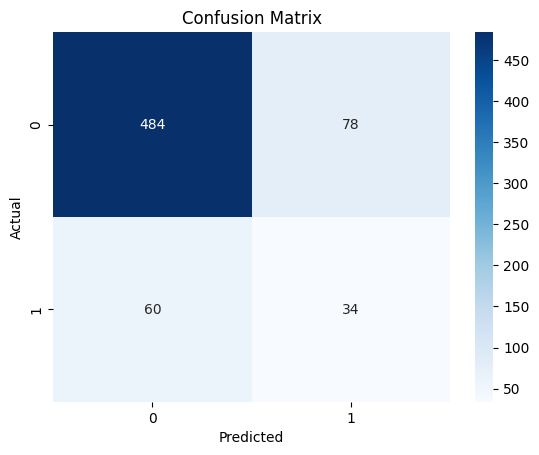

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       562
           1       0.30      0.36      0.33        94

    accuracy                           0.79       656
   macro avg       0.60      0.61      0.60       656
weighted avg       0.81      0.79      0.80       656



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:, 1]   

# Compute the confusion matrix and classification report of the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(cr)

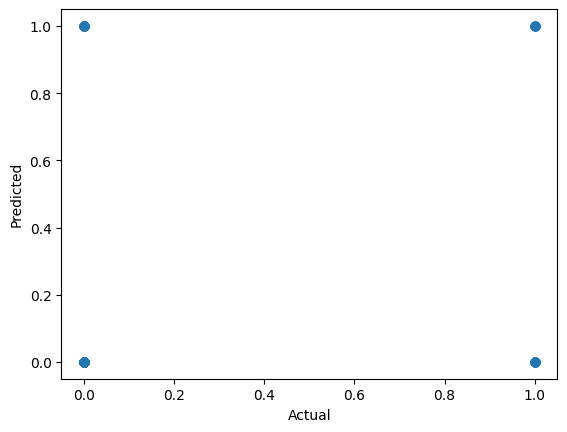

In [ ]:
# Create a scatter plot of the predicted versus actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaled_xtest = MinMaxScaler().fit_transform(X_test)
scaled_xtestDf = pd.DataFrame(scaled_xtest,columns = X_test.columns)
scaled_xtestDf

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,totChol_1,cigsPerDay_1,BMI_1,heartRate_1,education_1,BPMeds_1,newGlucose_1
0,1.0,0.648649,1.0,0.0,0.0,0.0,0.556180,0.568627,0.699531,0.40,0.344907,0.770833,0.000000,0.0,0.673021
1,1.0,0.540541,1.0,0.0,1.0,0.0,0.646067,0.519608,0.333333,0.40,0.570023,0.458333,0.000000,0.0,0.777778
2,0.0,0.783784,0.0,0.0,1.0,0.0,0.747191,0.607843,0.253521,0.00,0.482639,0.375000,0.333333,0.0,0.361111
3,0.0,0.108108,1.0,0.0,0.0,0.0,0.398876,0.411765,0.399061,0.20,0.287037,0.395833,1.000000,0.0,0.500000
4,1.0,0.189189,1.0,0.0,1.0,0.0,0.696629,0.735294,0.403756,0.80,0.673611,0.562500,0.000000,0.0,0.673021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.0,0.189189,0.0,0.0,0.0,0.0,0.466292,0.490196,0.469484,0.00,0.427662,0.562500,0.000000,0.0,0.027778
652,0.0,0.729730,1.0,0.0,0.0,0.0,0.438202,0.245098,0.521127,0.06,0.502894,0.833333,0.333333,0.0,0.666667
653,0.0,0.297297,1.0,0.0,0.0,0.0,0.196629,0.264706,0.234742,0.30,0.180556,0.645833,0.000000,0.0,0.527778
654,0.0,0.216216,1.0,0.0,0.0,0.0,0.151685,0.186275,0.328638,0.10,0.387731,0.479167,0.000000,0.0,0.673021


In [ ]:
scaled_xtrain = MinMaxScaler().fit_transform(X_train)
scaled_xtrainDf = pd.DataFrame(scaled_xtrain,columns = X_test.columns)
scaled_xtrainDf

,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,totChol_1,cigsPerDay_1,BMI_1,heartRate_1,education_1,BPMeds_1,newGlucose_1
0,0.0,0.162162,1.0,0.0,0.0,0.0,0.274286,0.116505,0.311927,0.16,0.380979,0.313725,0.666667,0.0,0.750000
1,0.0,0.351351,1.0,0.0,1.0,0.0,0.885714,0.728155,0.954128,0.02,0.536860,0.372549,0.666667,0.0,0.277778
2,1.0,0.459459,1.0,0.0,0.0,0.0,0.194286,0.271845,0.513761,0.70,0.303320,0.431373,1.000000,0.0,0.444444
3,1.0,0.378378,0.0,0.0,0.0,0.0,0.708571,0.815534,0.674312,0.00,0.472707,0.823529,0.000000,0.0,0.583333
4,1.0,0.432432,1.0,0.0,0.0,0.0,0.182857,0.116505,0.444954,0.40,0.413618,0.529412,0.000000,0.0,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,0.0,0.459459,1.0,0.0,1.0,0.0,0.691429,0.796117,0.844037,0.60,0.507597,0.470588,0.333333,0.0,0.673021
2616,0.0,0.486486,0.0,0.0,1.0,0.0,0.760000,0.466019,0.738532,0.00,0.580754,0.705882,0.000000,0.0,0.527778
2617,0.0,0.567568,0.0,0.0,0.0,0.0,0.600000,0.436893,0.752294,0.00,0.315138,0.392157,0.333333,0.0,0.673021
2618,0.0,0.378378,0.0,0.0,1.0,0.0,0.885714,0.728155,0.449541,0.00,0.386044,0.588235,0.000000,0.0,0.638889


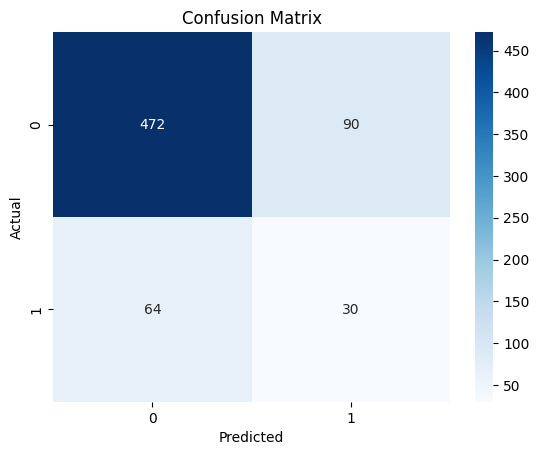

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       562
           1       0.25      0.32      0.28        94

    accuracy                           0.77       656
   macro avg       0.57      0.58      0.57       656
weighted avg       0.79      0.77      0.78       656



In [ ]:
dt.fit(scaled_xtrainDf, y_train)

y_Spred = dt.predict(scaled_xtestDf)
y_Sprob = dt.predict_proba(scaled_xtestDf)[:, 1]   

# Compute the confusion matrix and classification report of the model
scm = confusion_matrix(y_test, y_Spred)
scr = classification_report(y_test, y_Spred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(scm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(scr)

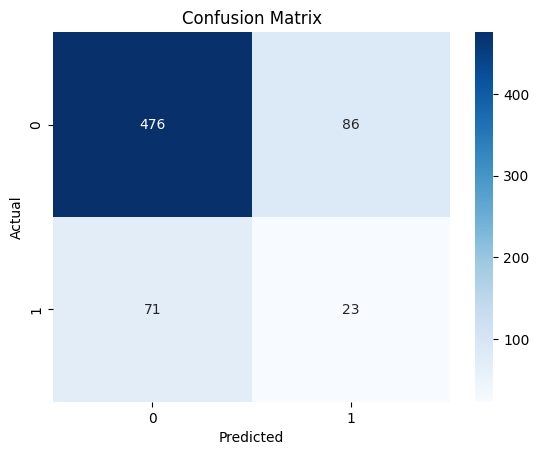

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       562
           1       0.21      0.24      0.23        94

    accuracy                           0.76       656
   macro avg       0.54      0.55      0.54       656
weighted avg       0.78      0.76      0.77       656



In [ ]:
xtrainFS = X_train.drop(['BPMeds_1','male','diabetes','prevalentHyp','prevalentStroke','cigsPerDay_1','currentSmoker'], axis=1)
xtestFS = X_test.drop(['BPMeds_1','male','diabetes','prevalentHyp','prevalentStroke','cigsPerDay_1','currentSmoker'], axis=1)

dt.fit(xtrainFS, y_train)

y_pred = dt.predict(xtestFS)
y_prob = dt.predict_proba(xtestFS)[:, 1]   

# Compute the confusion matrix and classification report of the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(cr)

In [ ]:
plt.figure(figsize=(200,100))
plot_tree(dt, filled=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.